In [7]:

import numpy as np
import torch


from cebmf_torch import *
import torch
import numpy as np

import matplotlib.pyplot as plt
from cebmf_torch.torch_ebnm.torch_ash import ash
from cebmf_torch.utils.torch_utils_mix import autoselect_scales_mix_norm
from cebmf_torch.utils.torch_distribution_operation import get_data_loglik_normal_torch
from cebmf_torch.utils.torch_mix_opt import optimize_pi_logL 
from cebmf_torch.utils.torch_posterior import posterior_mean_norm


betahat = torch.tensor([1.,2.,3.,4.,5.])
sebetahat = torch.tensor([1.,0.4,5.,1.,1.])
res = ash(betahat, sebetahat, mult=torch.sqrt(torch.tensor(2.0)).item(), prior="norm")
expected_log_lik = -16.91767637608251
expected_scale = np.array([0., 0.03827328, 0.05412659, 0.07654655, 0.10825318, 0.15309311,
                              0.21650635, 0.30618622, 0.4330127, 0.61237244, 0.8660254,
                              1.22474487, 1.73205081, 2.44948974, 3.46410162, 4.89897949,
                              6.92820323, 9.79795897])


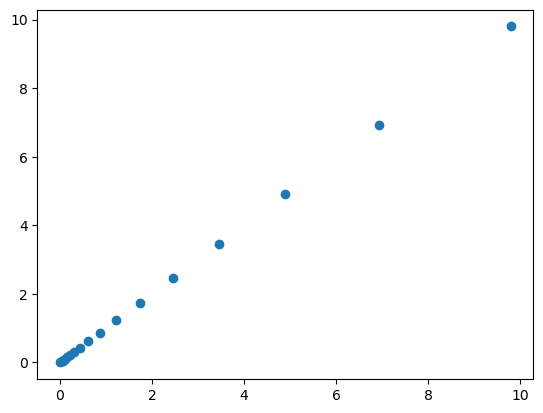

In [ ]:
plt.scatter(res.scale.cpu().numpy(), expected_scale)

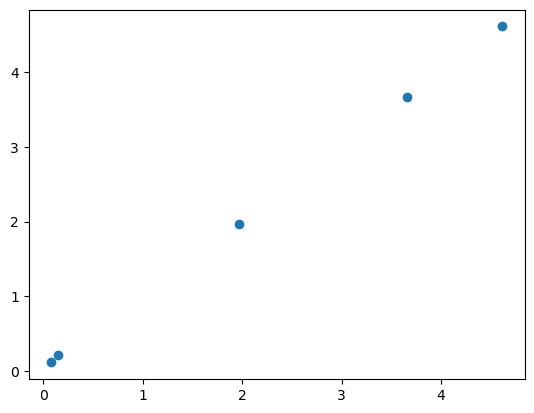

In [ ]:
plt.scatter(res.post_mean.cpu().numpy(), np.array([0.11126873, 1.97346787, 0.20802628, 3.6663574 , 4.61542534]))

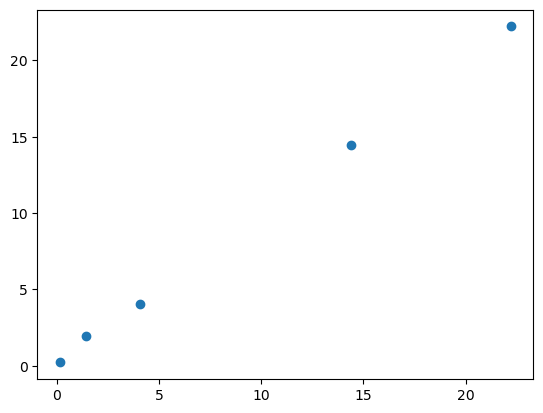

In [ ]:
plt.scatter(res.post_mean2.cpu().numpy(), np.array([ 0.21398654,  4.05293203,  1.93632865, 14.45535405, 22.22774277]) )

In [ ]:
res.log_lik

-17.7714900970459

In [ ]:
expected_log_lik

-16.91767637608251

In [ ]:

scale = autoselect_scales_mix_norm(betahat, sebetahat, mult=2.0)

In [ ]:

L = get_data_loglik_normal(betahat, sebetahat, torch.zeros_like(scale), scale)

In [ ]:

pi = optimize_pi_logL_torch(L, penalty=10, method="em", steps=5000, batch_size=120)
pi

tensor([7.0652e-01, 7.1429e-34, 7.1429e-34, 7.1429e-34, 7.1429e-34, 7.1429e-34,
        7.1429e-34, 7.1429e-34, 2.9348e-01, 7.1429e-34])

In [ ]:

out = posterior_mean_norm(betahat, sebetahat, torch.log(pi+1e-32), scale, location=torch.zeros_like(scale))
result = torch.exp(L) * torch.exp(pi)